# Identify DataSet and UseCase

The topic of my Capstone project will be to investigate the accidents occured in the US between February 2016 and June 2020. The goal of my project is to cover a variety of dimensions (from weather conditions to demography) and study the impact of such factors in the severity and location of accidents.

The dataset can be found here: https://smoosavi.org/datasets/us_accidents

In this notebook, I'll do an exploratory analysis of the data, making sure the data is representative of the problem to be solved and which limitations it has.

Descriptive statistics covered:<br>
<ul>
<li>univariate statistics (visualized with histograms, ...)</li>
<li>feature quality and importance assessed by pairwise correlation</li>
<li>missing values</li>
</ul>

In [1]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from datetime import datetime

In [2]:
df = pd.read_csv('US_Accidents_June20.csv')
print('df.shape', df.shape)
print()
df.head()

df.shape (3513617, 49)



,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


The dataset contains 3'513'617 rows (datapoints/accidents) and has 49 columns (featues), that cover location of the accident, date of the accident, severity and conditions.

# Data Exploration

In this section I'll go column by column and inspect the meaning of the feature, as well as the datatype.

In [3]:
#Inspect columns
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
#ID
df['ID'].unique().shape

(3513617,)

Makes sense that the number of IDs matches the total number of datapoints. That means that each point has a unique ID.

In [5]:
#Source
df['Source'].unique()

array(['MapQuest', 'MapQuest-Bing', 'Bing'], dtype=object)

There are 3 different datasources: <b>MapQuest</b>, <b>MapQuest-Bing</b> and <b>Bing</b>.

In [6]:
len(df['TMC'].unique())

22

I believe TMC stands for Traffic Message Channel. A traffic accident may have a TMC code which provides more detailed description of the event. Apparently there are 22 different codes present in the dataset.

In [7]:
#Severity
df['Severity'].unique()

array([3, 2, 1, 4])

4 values appear, with 4 being the highest severity and 1 the lowest. This will be very useful for the analysis.

In [8]:
#Start_Time and End_Time
print('Start_Time format:', type(df['Start_Time'][0]))
print()
print(df['Start_Time'].head(1))

print()
print()

print('End_Time format:', type(df['End_Time'][0]))
print()
print(df['End_Time'].head(1))

Start_Time format: <class 'str'>

0    2016-02-08 05:46:00
Name: Start_Time, dtype: object


End_Time format: <class 'str'>

0    2016-02-08 11:00:00
Name: End_Time, dtype: object


In [9]:
#Transform time in df
df['Start_Time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df['End_Time'] = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')

print('New data type after transformation:', df['End_Time'].dtype)

New data type after transformation: datetime64[ns]


The dates are given as Strings. I transformed it to datetime64.

In [10]:
#Start_Lat, Start_Lng, End_Lat, End_Lng
print('Start_Lng format:', type(df['Start_Lng'][0]))

Start_Lng format: <class 'numpy.float64'>


Latitudes and longitudes of the accidents are given for start- and end-time. They are given as Floats.

In [11]:
#Distance
display("Distance(mi):", df['Distance(mi)'][:5])
print()
print('Distance format:', type(df['Distance(mi)'][0]))

'Distance(mi):'

0    0.01
1    0.01
2    0.01
3    0.01
4    0.01
Name: Distance(mi), dtype: float64


Distance format: <class 'numpy.float64'>


The length of the road extent affected by the accident, given as Floats.

In [12]:
#Description
print('Description format:',type(df['Description'][0]))
print()

Description format: <class 'str'>



There is a description of the accident as text (str).

In [13]:
#Number, Street, Side, City, County, State, Zipcode, Country
for item in df.columns[12:20]:
    print(item,':',type(df[item][0]))

Number : <class 'numpy.float64'>
Street : <class 'str'>
Side : <class 'str'>
City : <class 'str'>
County : <class 'str'>
State : <class 'str'>
Zipcode : <class 'str'>
Country : <class 'str'>


The detailed addresses of the accidents are given. This will be very handy to plot the accidents in the map. The street number is given as a Float and the rest of the details (Street name, Side, etc.)

In [14]:
print("Number of unique values for Side:", len(df['Side'].unique()))
print("Unique values for Side:", df['Side'].unique())

Number of unique values for Side: 3
Unique values for Side: ['R' 'L' ' ']


'Side': Shows the relative side of the street (Right/Left) in address field.

In [15]:
#Timezone
print(df['Timezone'].unique())
print(type(df['Timezone'][0]))

['US/Eastern' 'US/Pacific' nan 'US/Central' 'US/Mountain']
<class 'str'>


Shows timezone based on the location of the accident (eastern, central, etc.).

In [16]:
#Airport code
print('Unique values for Airport_Code', df['Airport_Code'].unique().shape)
print()
print('Airport_Code format:', type(df['Airport_Code'][0]))
print()
display("Airport_Code example:", df['Airport_Code'].head(1))

Unique values for Airport_Code (2002,)

Airport_Code format: <class 'str'>



'Airport_Code example:'

0    KFFO
Name: Airport_Code, dtype: object

'Airport code': Denotes an airport-based weather station which is the closest one to location of the accident. It is given as a code in String.

In [17]:
#Weather_Timestamp
print('Weather_Timestamp example:', df['Weather_Timestamp'])
print()
print('Weather_Timestamp format:', type(df['Weather_Timestamp'][0]))

Weather_Timestamp example: 0          2016-02-08 05:58:00
1          2016-02-08 05:51:00
2          2016-02-08 06:56:00
3          2016-02-08 07:38:00
4          2016-02-08 07:53:00
                  ...         
3513612    2019-08-23 17:53:00
3513613    2019-08-23 18:53:00
3513614    2019-08-23 18:53:00
3513615    2019-08-23 18:51:00
3513616    2019-08-23 20:50:00
Name: Weather_Timestamp, Length: 3513617, dtype: object

Weather_Timestamp format: <class 'str'>


The Weather_Timestamp format is the same as for the other dates. The same typecasting can be used in order to make the data more handy.

In [18]:
#Temperature(F)
display(df['Temperature(F)'])
print()
print('Temperature format:', type(df['Temperature(F)'][0]))

0          36.9
1          37.9
2          36.0
3          35.1
4          36.0
           ... 
3513612    86.0
3513613    70.0
3513614    73.0
3513615    71.0
3513616    79.0
Name: Temperature(F), Length: 3513617, dtype: float64


Temperature format: <class 'numpy.float64'>


The temperature at the time of the accident is given in Fahrenheit as a Float.

In [19]:
#Wind_Chill(F)
display(df['Wind_Chill(F)'])
print()
print(type(df['Wind_Chill(F)'][2]))

0           NaN
1           NaN
2          33.3
3          31.0
4          33.3
           ... 
3513612    86.0
3513613    70.0
3513614    73.0
3513615    71.0
3513616    79.0
Name: Wind_Chill(F), Length: 3513617, dtype: float64


<class 'numpy.float64'>


Additionally, the temperature of the wind is also provided in Fahrenheit as Floats. A potential analysis could be to look at the difference in temperature of weather and wind and to try to link it to accident severity.

In [20]:
#Humidity(%)
print('Humidity format:', type(df['Humidity(%)'][0]))
print()
print(df['Humidity(%)'].head())

Humidity format: <class 'numpy.float64'>

0     91.0
1    100.0
2    100.0
3     96.0
4     89.0
Name: Humidity(%), dtype: float64


'Humidity(%)': Shows the humidity (in percentage).

In [21]:
#Pressure(in)
print('Pressure format:', type(df['Pressure(in)'][0]))

Pressure format: <class 'numpy.float64'>


'Pressure': Shows the air pressure (in inches), given as Float.

In [22]:
#Visibility(mi)
print(type(df['Visibility(mi)'][0]))

<class 'numpy.float64'>


'Visibility': Shows visibility (in miles) and is given as Floats.

In [23]:
#Wind_Direction and Wind_Speed
print('Wind_Direction')
print('*'*15)
print('Values for Wind_Direction:', df['Wind_Direction'].unique().shape)
print('Unique values:', df['Wind_Direction'].unique())
print('Wind_Direction format:', type(df['Wind_Direction'][0]))
print()
print()

print('Wind_Speed(mph)')
print('*'*10)
print('Wind_Speed format:', type(df['Wind_Speed(mph)'][0]))


Wind_Direction
***************
Values for Wind_Direction: (25,)
Unique values: ['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']
Wind_Direction format: <class 'str'>


Wind_Speed(mph)
**********
Wind_Speed format: <class 'numpy.float64'>


'Wind_Direction': Shows wind direction. There are 2 values for which I don't understand the difference: VAR and Variable...<br>
'Wind_Speed(mph)': Shows wind speed (in miles per hour) given as Float.

In [24]:
#Precipitation
type(df['Precipitation(in)'][0])

numpy.float64

In [25]:
#Weather_Condition
print('Unique values for Weather_Condition', df['Weather_Condition'].unique().shape)

Unique values for Weather_Condition (128,)


There are 128 different values for weather condition at the time of the accident. For an high-level assessment, it may make sense to group them in fewer groups.

In [26]:
#Amenity
print('Amenity format:', type(df['Amenity'][0]))

Amenity format: <class 'numpy.bool_'>


'Amenity': A POI (Point of Interest) annotation which indicates presence (Yes/No) of amenity in a nearby location and it is given as a Boolean.

In [27]:
#Bump, Crossing
print('Bump format:', type(df['Bump'][0]))
print('Crossing format:', type(df['Crossing'][0]))
print('Give_Way format:', type(df['Give_Way'][0]))
print('Junction format:', type(df['Junction'][0]))
print('No_Exit format:', type(df['No_Exit'][0]))
print('Roundabout format:', type(df['Roundabout'][0]))
print('Station format:', type(df['Station'][0]))
print('Stop format:', type(df['Stop'][0]))
print('Traffic_Calming format:', type(df['Traffic_Calming'][0]))
print('Traffic_Signal format:', type(df['Traffic_Signal'][0]))
print('Turning_Loop format:', type(df['Turning_Loop'][0]))

Bump format: <class 'numpy.bool_'>
Crossing format: <class 'numpy.bool_'>
Give_Way format: <class 'numpy.bool_'>
Junction format: <class 'numpy.bool_'>
No_Exit format: <class 'numpy.bool_'>
Roundabout format: <class 'numpy.bool_'>
Station format: <class 'numpy.bool_'>
Stop format: <class 'numpy.bool_'>
Traffic_Calming format: <class 'numpy.bool_'>
Traffic_Signal format: <class 'numpy.bool_'>
Turning_Loop format: <class 'numpy.bool_'>


'Bump': A POI annotation which indicates presence of speed bump or hump in a nearby location.<br>
'Crossing': A POI annotation which indicates presence of crossing in a nearby location.<br>
'Give_Way': A POI annotation which indicates presence of give_way in a nearby location.<br>
'Junction': A POI annotation which indicates presence of junction in a nearby location.<br>
'No_Exit': A POI annotation which indicates presence of no_exit in a nearby location.<br>
'Railway': A POI annotation which indicates presence of railway in a nearby location.<br>
'Roundabout': A POI annotation which indicates presence of roundabout in a nearby location.<br>
'Station': A POI annotation which indicates presence of station in a nearby location.<br>
'Stop': A POI annotation which indicates presence of stop in a nearby location.<br>
'Traffic_Calming': A POI annotation which indicates presence of traffic_calming in a nearby location.<br>
'Traffic_Signal': A POI annotation which indicates presence of traffic_signal in a nearby location.<br>
'Turning_Loop': A POI annotation which indicates presence of turning_loop in a nearby location.<br>

In [28]:
#Sunrise_Sunset
print('Sunrise_Sunset unique values:', df['Sunrise_Sunset'].unique())
print('Sunrise_Sunset format:', type(df['Sunrise_Sunset'][0]))

Sunrise_Sunset unique values: ['Night' 'Day' nan]
Sunrise_Sunset format: <class 'str'>


'Sunrise_Sunset': Shows the period of day (Day or Night) based on sunrise/sunset, given as a String.

In [29]:
#Civil_Twilight
df['Civil_Twilight'].unique()

array(['Night', 'Day', nan], dtype=object)

'Civil_Twilight': Shows the period of day (i.e. day or night) based on civil twilight.

In [30]:
#Nautical_Twilight
df['Nautical_Twilight'].unique()

array(['Night', 'Day', nan], dtype=object)

'Nautical_Twilight': Shows the period of day (i.e. day or night) based on nautical twilight.

In [31]:
#Astronomical_Twilight
df['Astronomical_Twilight'].unique()

array(['Night', 'Day', nan], dtype=object)

## Create a summary table with description, data type and example.

In order to create the table for all 49 features I'll use the table of the owners of the dataset as a basis and then will append additional columns. In order to access it I'll use BeautifulSoup.


In [32]:
import requests # library to handle requests
from bs4 import BeautifulSoup

In [33]:
#Get access to the website where the table is uploaded.
url = "https://smoosavi.org/datasets/us_accidents" #last accessed the website on the 21.09.2020

html_doc = requests.get(url)

soup = BeautifulSoup(html_doc.text, "html.parser")
print(soup.title.text)

US-Accidents: A Countrywide Traffic Accident Dataset - Sobhan Moosavi


In [34]:
#Access the table
feature_table = soup.find("table")
#feature_table

In [35]:
headers = feature_table.find_all("th")
for i, head in enumerate(headers): headers[i]=str(headers[i]).replace('<th style="text-align: center">',"").replace("</th>","").replace("\n","").replace("<th>", "")
headers

['#', 'Attribute', 'Description', 'Nullable']

In [36]:
body = feature_table.find_all("tr")
body = body[1:len(body)]
for i, bod in enumerate(body): body[i] = str(body[i]).replace('<tr><td style="text-align: center">', "").replace('</td><td style="text-align: center">', "\n,").replace('</td><td>', '\n,').replace("</td></tr>", '')
body

['1\n,ID\n,This is a unique identifier of the accident record.\n,No',
 '2\n,Source\n,Indicates source of the accident report (i.e. the API which reported the accident.).\n,No',
 '3\n,TMC\n,A traffic accident may have a <a href="https://wiki.openstreetmap.org/wiki/TMC/Event_Code_List" target="_blank">Traffic Message Channel (TMC)</a> code which provides more detailed description of the event.\n,Yes',
 '4\n,Severity\n,Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).\n,No',
 '5\n,Start_Time\n,Shows start time of the accident in local time zone.\n,No',
 '6\n,End_Time\n,Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.\n,No',
 '7\n,Start_Lat\n,Shows latitude in GPS coordinate of the start point.\n,No',
 '8\n,Start_Lng\n,Shows longitude 

In [37]:
#Use the table of the publication website as basis and add two new columns: one with the datatype of the variable ('Data Type') and another with an example value ('Example')
feature_df = pd.DataFrame(body)
feature_df.columns = ["dummy"]
feature_df.iloc[0]
feature_df

#split
feature_df[headers] = feature_df['dummy'].str.split('\n,', n = 3, expand = True)
#drop dummy column
feature_df.drop("dummy", axis = 1, inplace = True)
#drop Nullable column
feature_df.drop("Nullable", axis = 1, inplace = True)

#Append new column with data type
zero_arr = np.zeros(shape=(1, len(df.columns)))
new_vec1 = pd.DataFrame(zero_arr)

for i in range(len(df.columns)):
    new_vec1[i] = type(df.iloc[1,i])
new_vec1 = new_vec1.transpose()

#concatenate vector that contains data type of the feature to base df
feature_df = pd.concat([feature_df, new_vec1], axis=1)

#Append new column with example
import math

zero_arr = np.zeros(shape=(1, len(df.columns)))
new_vec2 = pd.DataFrame(zero_arr)
for i in range(len(df.columns)):
    for j in range(100):
        while df.iloc[j,i]=='nan':
            j+=1
        while df.iloc[j,i]=='NaN':
            j+=1
        if isinstance(df.iloc[j,i], float): 
            while math.isnan(df.iloc[j,i]):
                j+=1
        new_vec2[i] = df.iloc[j,i]
        break
new_vec2 = new_vec2.transpose()

feature_df = pd.concat([feature_df, new_vec2], axis=1)

#rename columns
feature_df.columns=(['#','Attribute', 'Description', 'Data type', 'Example'])

#export
feature_df.to_csv("Week1_Variable_Summary_Table.csv")
feature_df

,#,Attribute,Description,Data type,Example
0,1,ID,This is a unique identifier of the accident re...,<class 'str'>,A-1
1,2,Source,Indicates source of the accident report (i.e. ...,<class 'str'>,MapQuest
2,3,TMC,"A traffic accident may have a <a href=""https:/...",<class 'numpy.float64'>,201
3,4,Severity,"Shows the severity of the accident, a number b...",<class 'numpy.int64'>,3
4,5,Start_Time,Shows start time of the accident in local time...,<class 'pandas._libs.tslibs.timestamps.Timesta...,2016-02-08 05:46:00
5,6,End_Time,Shows end time of the accident in local time z...,<class 'pandas._libs.tslibs.timestamps.Timesta...,2016-02-08 11:00:00
6,7,Start_Lat,Shows latitude in GPS coordinate of the start ...,<class 'numpy.float64'>,39.8651
7,8,Start_Lng,Shows longitude in GPS coordinate of the start...,<class 'numpy.float64'>,-84.0587
8,9,End_Lat,Shows latitude in GPS coordinate of the end po...,<class 'numpy.float64'>,40.1121
9,10,End_Lng,Shows longitude in GPS coordinate of the end p...,<class 'numpy.float64'>,-83.0319


# Univariate Analysis

Here I'll look at the data type of each feature and print it.<br>
If the feature's data type is a Float, I'll print the maximum and minimum value.<br>
If the feature's data type is a String, I'll look at how many unique values it has. If the number of values is 10 or less, I'll print those values.

In [38]:
#Max and Min Value
for feature in df.columns:
    print('*'*5, feature, '*'*5)
    print('Type:', type(df[feature][0]))
    
    #if the value is a float print max and min value
    if isinstance(df[feature][0], float):
        print("Max val:", np.nanmax(df[feature]))
        print("Min val:", np.nanmin(df[feature]))
        print("Average value:", df[feature].mean(axis=0))
    
    print('Number of unique values:', len(df[feature].unique()))
    #if there are 10 unique values or less, print them
    if len(df[feature].unique()) <= 10:
        print("Unique values:", df[feature].unique())
    
    print()

***** ID *****
Type: <class 'str'>
Number of unique values: 3513617

***** Source *****
Type: <class 'str'>
Number of unique values: 3
Unique values: ['MapQuest' 'MapQuest-Bing' 'Bing']

***** TMC *****
Type: <class 'numpy.float64'>
Max val: 406.0
Min val: 200.0
Average value: 208.02258052023183
Number of unique values: 22

***** Severity *****
Type: <class 'numpy.int64'>
Number of unique values: 4
Unique values: [3 2 1 4]

***** Start_Time *****
Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Number of unique values: 3200042

***** End_Time *****
Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Number of unique values: 3246120

***** Start_Lat *****
Type: <class 'numpy.float64'>
Max val: 49.002201
Min val: 24.555269
Average value: 36.54194510119794
Number of unique values: 1124695

***** Start_Lng *****
Type: <class 'numpy.float64'>
Max val: -67.113167
Min val: -124.623833
Average value: -95.79151150025119
Number of unique values: 1113407

***** End_Lat *****
Type: <c

## Plots: Distribution of Features

### Source

In [39]:
# Source
df['Source'].unique()

array(['MapQuest', 'MapQuest-Bing', 'Bing'], dtype=object)

In [40]:
count_vec = np.zeros(shape=(len(df['Source'].unique()), 1))
print('count_vec.shape:', count_vec.shape)
print()
i=0
for element in df['Source'].unique():
    count_vec
    count_vec[i] = df.loc[df['Source']==element].shape[0]
    print(element, ':', count_vec[i])
    i+=1
count_vec=count_vec.transpose()

count_vec.shape: (3, 1)

MapQuest : [2414301.]
MapQuest-Bing : [64517.]
Bing : [1034799.]


/Users/pedro.roig.aparicio@ibm.com/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


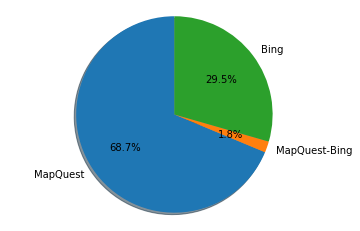

In [41]:
#Plot pie diagram
labels = df['Source'].unique()
size = np.zeros(shape=(1, len(df['Source'].unique())))
sizes = count_vec

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### TMC

In [42]:
df['TMC'].unique().shape

(22,)

In [43]:
count_vec = np.zeros(shape=(len(df['TMC'].unique()), 1))
print('count_vec.shape:',count_vec.shape)
print()
i=0
for element in df['TMC'].unique():
    count_vec
    count_vec[i] = df.loc[df['TMC']==element].shape[0]
    print(element, ':', count_vec[i])
    i+=1
count_vec=count_vec.transpose()

count_vec.shape: (22, 1)

201.0 : [2080341.]
241.0 : [249852.]
247.0 : [4775.]
246.0 : [7118.]
341.0 : [592.]
406.0 : [11109.]
245.0 : [40338.]
248.0 : [1025.]
200.0 : [66.]
244.0 : [12185.]
203.0 : [17639.]
229.0 : [22932.]
222.0 : [13154.]
202.0 : [6298.]
206.0 : [1274.]
343.0 : [6930.]
236.0 : [2121.]
239.0 : [54.]
336.0 : [89.]
339.0 : [920.]
351.0 : [6.]
nan : [0.]


/Users/pedro.roig.aparicio@ibm.com/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


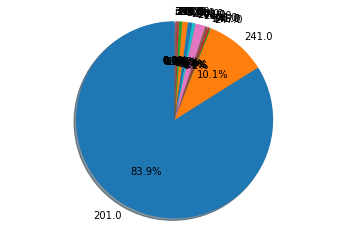

In [44]:
#Plot pie diagram
labels = df['TMC'].unique()
size = np.zeros(shape=(len(df['Source'].unique()), 1))
sizes = count_vec

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The code that appears the most is 201 (almost 84% of the times), which stands for 'Accident(s)'.<br>
The second most frequent TMC code is 241, which stands for 'accident(s). Right lane blocked'.

### Severity

The severity of the accidents is given in a scale from 1 to 4, where 1 means small impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

In [45]:
print('Number of different values for "Severity":', df['Severity'].unique().shape)

Number of different values for "Severity": (4,)


In [46]:
count_vec = np.zeros(shape=(len(df['Severity'].unique()), 1))
print('count_vec.shape:',count_vec.shape)
print()
i=0
for element in df['Severity'].unique():
    count_vec
    count_vec[i] = df.loc[df['Severity']==element].shape[0]
    print(element, ':', count_vec[i])
    i+=1
count_vec=count_vec.transpose()

count_vec.shape: (4, 1)

3 : [998913.]
2 : [2373210.]
1 : [29174.]
4 : [112320.]


In [47]:
df['Severity'].unique()

array([3, 2, 1, 4])

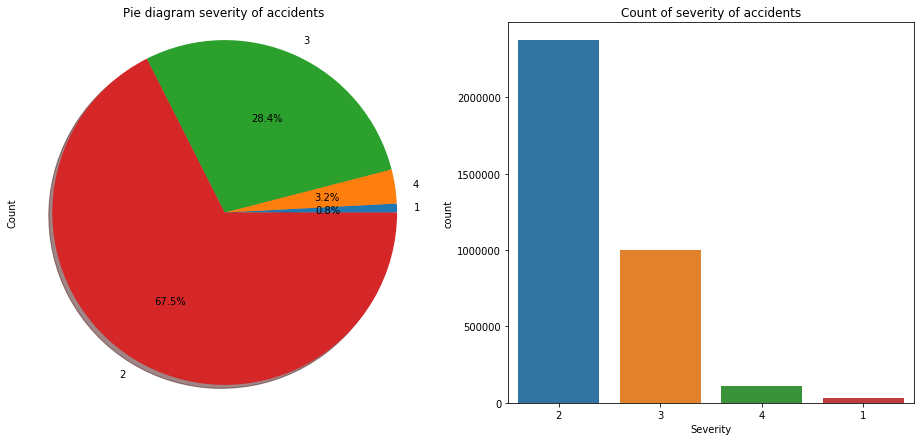

In [48]:
#Plot pie diagram and histogram
fig, ax = plt.subplots(1,2, figsize=(16,7))
df.Severity.value_counts().sort_values(ascending=False)[:10].sort_values().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie diagram severity of accidents')
ax[0].set_ylabel('Count')
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

sns.countplot('Severity',data=df,ax=ax[1],order=df['Severity'].value_counts().index)
ax[1].set_title('Count of severity of accidents')
plt.show()

### Times -> Accident Duration

In [49]:
#At first I'll reformat the times to be Timestamps, so they are easier to work with
start_time_vec = df['Start_Time']
end_time_vec = df['End_Time']

In [50]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [51]:
#Calculate the duration of each accident
df['Duration'] = end_time_vec-start_time_vec
#put columns in new order
new_order_columns = ['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Duration', 
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']
df = df[new_order_columns]
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Duration,Start_Lat,Start_Lng,End_Lat,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,05:14:00,39.865147,-84.058723,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,00:30:00,39.928059,-82.831184,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,00:30:00,39.063148,-84.032608,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,00:30:00,39.747753,-84.205582,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,00:30:00,39.627781,-84.188354,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,00:28:36,34.002480,-117.379360,33.99888,...,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,00:26:53,32.766960,-117.148060,32.76555,...,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,00:28:28,33.775450,-117.847790,33.77740,...,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,00:29:21,33.992460,-118.403020,33.98311,...,False,False,False,False,False,False,Day,Day,Day,Day


In [52]:
top_10 = df['Duration'].astype('timedelta64[m]').value_counts().nlargest(10)
top_10

29.0     1107012
44.0      414948
360.0     368636
59.0      233192
30.0      120760
45.0       98348
28.0       89144
60.0       70292
74.0       58969
240.0      55502
Name: Duration, dtype: int64

In [53]:
#Average duration
avg_duration = df['Duration'].mean(axis=0)
avg_duration

Timedelta('0 days 01:55:19.101387')

In [54]:
select = df[(df['Duration'].astype('timedelta64[m]') > 60) & (df['Duration'].astype('timedelta64[m]') <= 120)]
sum_select = len(select)
sum_select

464643

The average duration of an accident is: <b>1:55:19.1</b> hours

In [55]:
df_duration_grouped = np.zeros(shape = [12,1])

#populate first cell with number of accident that lasted 1 hour or less, the second cell with the accidents that lasted 1-2 hours, etc.
for i in range(10):
    select = df[(df['Duration'].astype('timedelta64[m]') < (10-i)*60) & (df['Duration'].astype('timedelta64[m]') >= (9-i)*60)]
    select = select['Duration']
    df_duration_grouped[9-i] = len(select)
    print((10-i)*60, '> x >=', (9-i)*60, ':', df_duration_grouped[9-i])

#values equal or bigger 7*60
select = df[(df['Duration'].astype('timedelta64[m]') >= 10*60)]
select = select['Duration']
df_duration_grouped[10] = len(select)
print('x >=', 10*60, ':', df_duration_grouped[10])

#negative and zero values
select = df[df['Duration'].astype('timedelta64[m]') <= 0]
select = select['Duration']
df_duration_grouped[11] = len(select)
print('x <= 0 :', df_duration_grouped[11])
print()

print('SANITY CHECK: see if all values are present')
print('*'*44)
print('Data avilable in original dataset:', df.shape[0])
print('Total data avilable in grouped dataset:', df_duration_grouped.sum())
print()

if (df.shape[0] == df_duration_grouped.sum()):
    print("Both numbers are the same! Sanity Check passed :)")
else:
    print("There is some data missing after the split! Number of datapoints missing:", df.shape[0] - df_duration_grouped.sum())
    
#transform to dataframe
df_duration_grouped = pd.DataFrame(df_duration_grouped)

600 > x >= 540 : [838.]
540 > x >= 480 : [1753.]
480 > x >= 420 : [2737.]
420 > x >= 360 : [378065.]
360 > x >= 300 : [4518.]
300 > x >= 240 : [69286.]
240 > x >= 180 : [28715.]
180 > x >= 120 : [94051.]
120 > x >= 60 : [526589.]
60 > x >= 0 : [2402054.]
x >= 600 : [4989.]
x <= 0 : [22.]

SANITY CHECK: see if all values are present
********************************************
Data avilable in original dataset: 3513617
Total data avilable in grouped dataset: 3513617.0

Both numbers are the same! Sanity Check passed :)


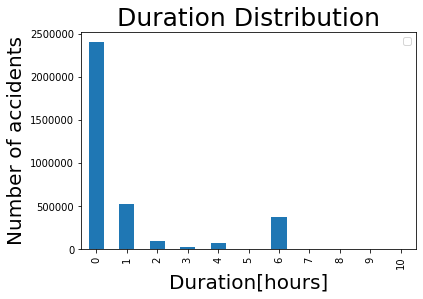

In [56]:
#Plot Histogram

df_duration_grouped[:11].plot.bar(width=0.5,align='center',linewidth=2)
plt.xlabel('Duration[hours]',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
plt.legend("")
plt.title('Duration Distribution',fontsize=25)

#Legend:
# 0: 0-1 hours
# 1: 1-2 hours
# 2: 2-3 hours
# 3: 3-4 hours
# 4: 4-5 hours
# 5: 5-6 hours
# 6: 6-7 hours
# 7: 7-8 hours
# 8: 8-9 hours
# 9: 9-10 hours
# 10: >10 hours


plt.show()

There is a peak in the accidents that last between 6-7 hours.

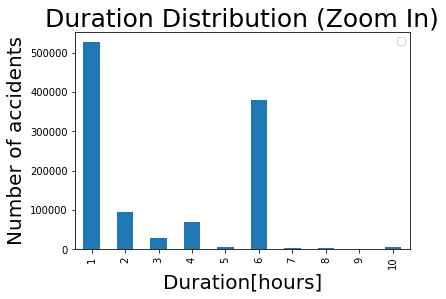

In [57]:
#Plot again without first column to see more zoomed in
df_duration_grouped[1:11].plot.bar(width=0.5,align='center',linewidth=2)
plt.xlabel('Duration[hours]',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
plt.legend("")
plt.title('Duration Distribution (Zoom In)',fontsize=25)

plt.show()

There is clearly a weird peak between 6-7 hours until the accident is cleared out, I don't know why...

### Location of the Accidents

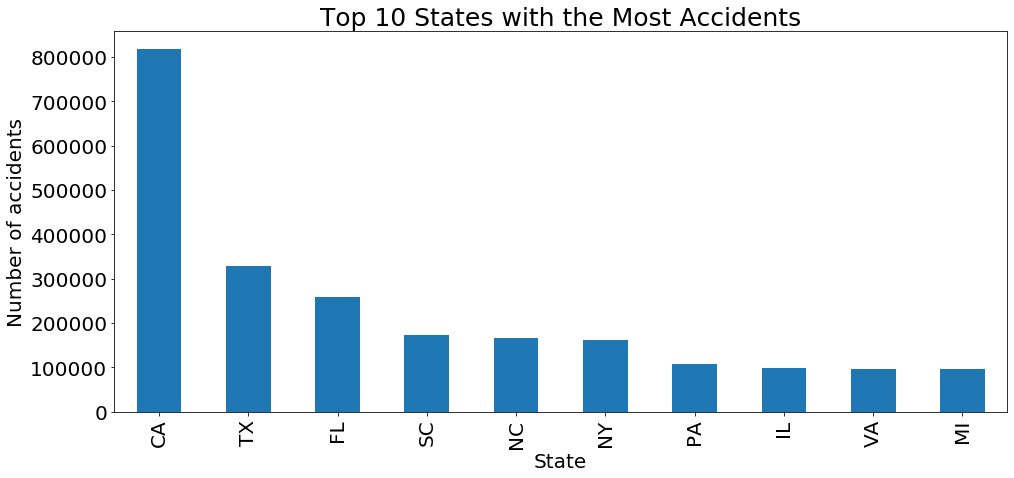

In [58]:
# See in which states do the most accidents happen
fig, ax = plt.subplots(figsize=(16,7))
df.State.value_counts().sort_values(ascending=False)[:10].plot.bar(width=0.5,align='center',linewidth=2)
plt.xlabel('State',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Top 10 States with the Most Accidents',fontsize=25)
plt.ioff()

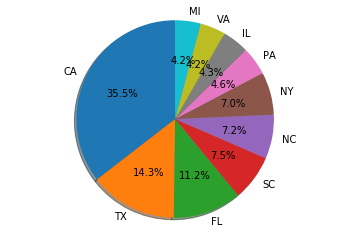

In [59]:
#Plot pie diagram
labels = df.State.value_counts().sort_values(ascending=False).index[:10]
sizes = df.State.value_counts().sort_values(ascending=False)[:10]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [60]:
#plot the states where the average severity is the highest as Boxplot. Fot this I will use the seaborn library.

severity_state_mean = df.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity').reset_index()
severity_state_mean[-5:]
#severity_state_std = df.groupby('State').agg({'Severity': 'std'}).sort_values('Severity').reset_index()

#std_vec_top_5 = [severity_state_std.loc[(severity_state_std['State']=='SD')][0].iloc[0][1], severity_state_std.loc[(severity_state_std['State']=='WY')][0].iloc[0][1], severity_state_std.loc[(severity_state_std['State']=='ND')][0].iloc[0][1], severity_state_std.loc[(severity_state_std['State']=='AR')][0].iloc[0][1], severity_state_std.loc[(severity_state_std['State']=='MT')][0].iloc[0][1]]
#std_vec_top_5 = pd.DataFrame(std_vec_top_5)

,State,Severity
44,MT,2.693359
45,AR,2.736083
46,ND,2.772727
47,WY,3.125984
48,SD,3.311475


Data available:
********************
SD 61
WY 508
ND 44
AR 2012
MT 512


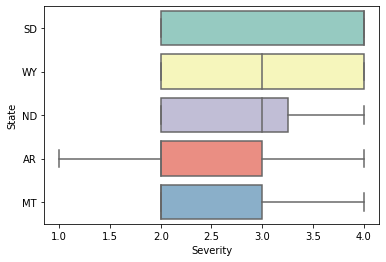

In [61]:
#Plot Boxplot of top 5 States with highest mean Severity
selection_df_SD = df.loc[(df["State"]=="SD")]
selection_df_WY = df.loc[(df["State"]=="WY")]
selection_df_ND = df.loc[(df["State"]=="ND")]
selection_df_AR = df.loc[(df["State"]=="AR")]
selection_df_MT = df.loc[(df["State"]=="MT")]

df_top5_states = pd.concat([selection_df_SD, selection_df_WY, selection_df_ND, selection_df_AR, selection_df_MT])

ax = sns.boxplot(x="Severity", y="State", data=df_top5_states, palette="Set3")

print('Data available:')
print("*"*20)
print("SD", selection_df_SD.shape[0])
print("WY", selection_df_WY.shape[0])
print("ND", selection_df_ND.shape[0])
print("AR", selection_df_AR.shape[0])
print("MT", selection_df_MT.shape[0])

One can see that 3 top boxplots show no Severity 1 accidents. It has to be noticed that for SD and ND the number of reported accidents is very low (61 and 44 respectively).

### Side of the car hit during the crash

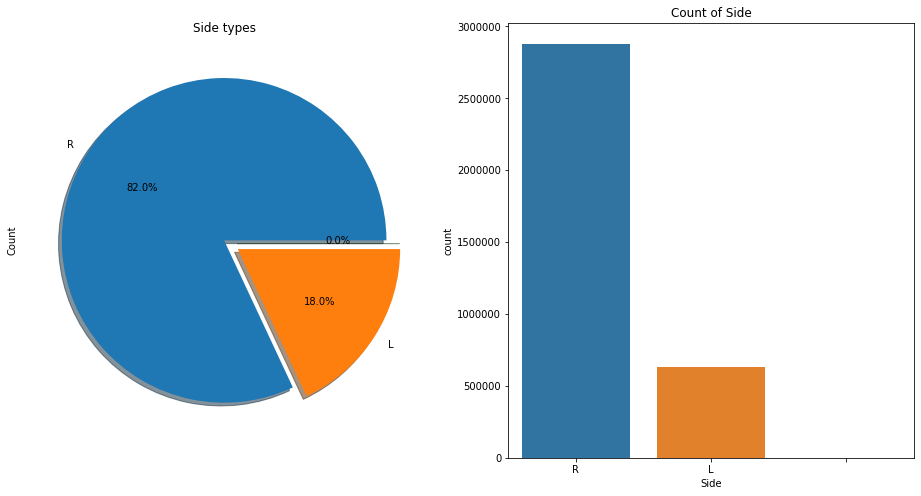

In [62]:
#Plot pie diagram
fig, ax = plt.subplots(1,2,figsize=(16,8))
df['Side'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Side types')
ax[0].set_ylabel('Count')

sns.countplot('Side',data=df,ax=ax[1],order=df['Side'].value_counts().index)
ax[1].set_title('Count of Side')
plt.show()

In [63]:
df.loc[df['Side']==' ']

,ID,Source,TMC,Severity,Start_Time,End_Time,Duration,Start_Lat,Start_Lng,End_Lat,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
27076,A-27077,MapQuest,201.0,2,2016-08-12 20:21:24,2016-08-12 20:51:24,00:30:00,37.712921,-122.139587,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day


In the mayority of accidents the right side is involved.<br> There is only 1 datapoint where the Side isn't left or right. I'll treat that datapoint as an outlier.

### Weather

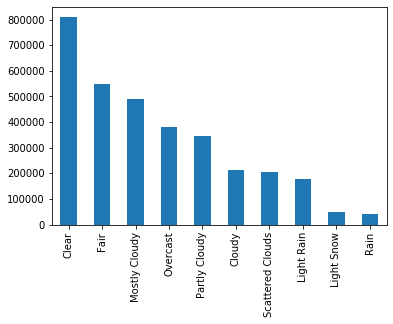

In [64]:
# Which weather conditions are most present in accidents
df.Weather_Condition.value_counts().sort_values(ascending=False)[:10].plot.bar(width=0.5,align='center',linewidth=2)

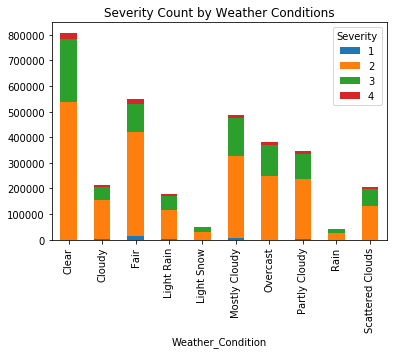

In [65]:
# Weather and Severity

# First only select the top 10 weather coditions
top10_weather_conditions_vec = df.Weather_Condition.value_counts().sort_values(ascending=False)[:10].index

df_selection_weather_top10 = df.loc[df['Weather_Condition'].isin(top10_weather_conditions_vec)]
df_weather_severity = df_selection_weather_top10.groupby(['Severity','Weather_Condition']).size().reset_index().pivot(columns='Severity', index='Weather_Condition', values=0)
df_weather_severity.plot(kind='bar', stacked=True, title='Severity Count by Weather Conditions')

One can see the severity is pretty evenly distributed along weather conditions.

### Traffic Objects Present in Accidents

/Users/pedro.roig.aparicio@ibm.com/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


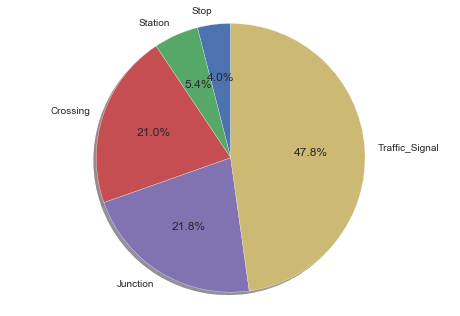

In [95]:
list_bools_in_df = df.columns[33:46]

df_objects = df[list_bools_in_df]
df_objects_sum = df_objects.sum(axis=0)
df_objects_sum = pd.DataFrame(df_objects_sum)
df_objects_sum.columns = ['sum']
df_objects_sum = df_objects_sum.sort_values(by='sum', ascending=True)

#Plot top 5 most present traffic objects

fig1, ax1 = plt.subplots()
ax1.pie(df_objects_sum[-5:], labels=df_objects_sum.index[-5:], autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The top 5 traffic objects that are present in most of the accidents are: Traffic_Signal, Juntion, Crossing, Station and Stop.

## Time Progression Study

### Mean Severity Evolution

In [67]:
# calculate mean severity for each 6 months
df_mean_severity_6months = np.zeros(shape=[9,1])

#put in 1st cell the mean severity until June 2016. In the 2nd cell the mean between July and December 2016 and so on...
df_mean_severity_6months[0] = df.loc[df['Start_Time'] < datetime.strptime('2016-06-30 23:59:59', '%Y-%m-%d %H:%M:%S')]['Severity'].mean()
df_mean_severity_6months[1] = df.loc[(datetime.strptime('2016-06-30 23:59:59', '%Y-%m-%d %H:%M:%S') < df['Start_Time']) & (df['Start_Time'] < datetime.strptime('2016-12-31 23:59:59', '%Y-%m-%d %H:%M:%S'))]['Severity'].mean()
df_mean_severity_6months[2] = df.loc[(datetime.strptime('2016-12-31 23:59:59', '%Y-%m-%d %H:%M:%S') < df['Start_Time']) & (df['Start_Time'] < datetime.strptime('2017-06-30 23:59:59', '%Y-%m-%d %H:%M:%S'))]['Severity'].mean()
df_mean_severity_6months[3] = df.loc[(datetime.strptime('2017-06-30 23:59:59', '%Y-%m-%d %H:%M:%S') < df['Start_Time']) & (df['Start_Time'] < datetime.strptime('2017-12-31 23:59:59', '%Y-%m-%d %H:%M:%S'))]['Severity'].mean()
df_mean_severity_6months[4] = df.loc[(datetime.strptime('2017-12-31 23:59:59', '%Y-%m-%d %H:%M:%S') < df['Start_Time']) & (df['Start_Time'] < datetime.strptime('2018-06-30 23:59:59', '%Y-%m-%d %H:%M:%S'))]['Severity'].mean()
df_mean_severity_6months[5] = df.loc[(datetime.strptime('2018-06-30 23:59:59', '%Y-%m-%d %H:%M:%S') < df['Start_Time']) & (df['Start_Time'] < datetime.strptime('2018-12-31 23:59:59', '%Y-%m-%d %H:%M:%S'))]['Severity'].mean()
df_mean_severity_6months[6] = df.loc[(datetime.strptime('2018-12-31 23:59:59', '%Y-%m-%d %H:%M:%S') < df['Start_Time']) & (df['Start_Time'] < datetime.strptime('2019-06-30 23:59:59', '%Y-%m-%d %H:%M:%S'))]['Severity'].mean()
df_mean_severity_6months[7] = df.loc[(datetime.strptime('2019-06-30 23:59:59', '%Y-%m-%d %H:%M:%S') < df['Start_Time']) & (df['Start_Time'] < datetime.strptime('2019-12-31 23:59:59', '%Y-%m-%d %H:%M:%S'))]['Severity'].mean()
df_mean_severity_6months[8] = df.loc[(datetime.strptime('2019-12-31 23:59:59', '%Y-%m-%d %H:%M:%S') < df['Start_Time']) & (df['Start_Time'] < datetime.strptime('2020-06-30 23:59:59', '%Y-%m-%d %H:%M:%S'))]['Severity'].mean()

df_mean_severity_6months = pd.DataFrame(df_mean_severity_6months)
df_mean_severity_6months.index = ['2016 H1', '2016 H2', '2017 H1', '2017 H2', '2018 H1', '2018 H2', '2019 H1', '2019 H2', '2020 H1']
df_mean_severity_6months.columns = ['Mean Severity']
df_mean_severity_6months

,Mean Severity
2016 H1,2.396307
2016 H2,2.372329
2017 H1,2.393091
2017 H2,2.386050
2018 H1,2.398243
2018 H2,2.372652
2019 H1,2.357374
2019 H2,2.266458
2020 H1,2.228253


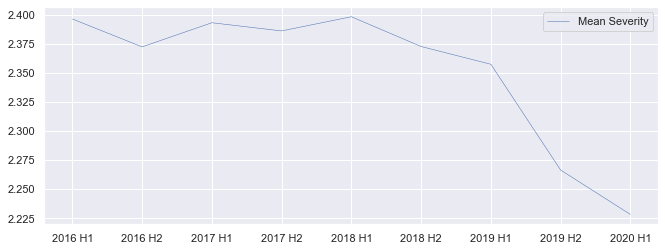

In [68]:
# plot time series
sns.set(rc={'figure.figsize':(11, 4)})

ax = df_mean_severity_6months.plot(linewidth=0.5)
ax.grid(True)

### Number of accidents time evolution

In [69]:
# calculate number of accidents each 6 months
df_mean_accidents_6months = np.zeros(shape=[9,1])

#put in 1st cell the mean severity until June 2016. In the 2nd cell the mean between July and December 2016 and so on...
df_mean_accidents_6months[0] = df.loc[df['Start_Time'] < datetime.strptime('2016-06-30 23:59:59', '%Y-%m-%d %H:%M:%S')].shape[0]
df_mean_accidents_6months[1] = df.loc[(datetime.strptime('2016-06-30 23:59:59', '%Y-%m-%d %H:%M:%S') < df['Start_Time']) & (df['Start_Time'] < datetime.strptime('2016-12-31 23:59:59', '%Y-%m-%d %H:%M:%S'))].shape[0]
df_mean_accidents_6months[2] = df.loc[(datetime.strptime('2016-12-31 23:59:59', '%Y-%m-%d %H:%M:%S') < df['Start_Time']) & (df['Start_Time'] < datetime.strptime('2017-06-30 23:59:59', '%Y-%m-%d %H:%M:%S'))].shape[0]
df_mean_accidents_6months[3] = df.loc[(datetime.strptime('2017-06-30 23:59:59', '%Y-%m-%d %H:%M:%S') < df['Start_Time']) & (df['Start_Time'] < datetime.strptime('2017-12-31 23:59:59', '%Y-%m-%d %H:%M:%S'))].shape[0]
df_mean_accidents_6months[4] = df.loc[(datetime.strptime('2017-12-31 23:59:59', '%Y-%m-%d %H:%M:%S') < df['Start_Time']) & (df['Start_Time'] < datetime.strptime('2018-06-30 23:59:59', '%Y-%m-%d %H:%M:%S'))].shape[0]
df_mean_accidents_6months[5] = df.loc[(datetime.strptime('2018-06-30 23:59:59', '%Y-%m-%d %H:%M:%S') < df['Start_Time']) & (df['Start_Time'] < datetime.strptime('2018-12-31 23:59:59', '%Y-%m-%d %H:%M:%S'))].shape[0]
df_mean_accidents_6months[6] = df.loc[(datetime.strptime('2018-12-31 23:59:59', '%Y-%m-%d %H:%M:%S') < df['Start_Time']) & (df['Start_Time'] < datetime.strptime('2019-06-30 23:59:59', '%Y-%m-%d %H:%M:%S'))].shape[0]
df_mean_accidents_6months[7] = df.loc[(datetime.strptime('2019-06-30 23:59:59', '%Y-%m-%d %H:%M:%S') < df['Start_Time']) & (df['Start_Time'] < datetime.strptime('2019-12-31 23:59:59', '%Y-%m-%d %H:%M:%S'))].shape[0]
df_mean_accidents_6months[8] = df.loc[(datetime.strptime('2019-12-31 23:59:59', '%Y-%m-%d %H:%M:%S') < df['Start_Time']) & (df['Start_Time'] < datetime.strptime('2020-06-30 23:59:59', '%Y-%m-%d %H:%M:%S'))].shape[0]

df_mean_accidents_6months = pd.DataFrame(df_mean_accidents_6months)
df_mean_accidents_6months.index = ['2016 H1', '2016 H2', '2017 H1', '2017 H2', '2018 H1', '2018 H2', '2019 H1', '2019 H2', '2020 H1']
df_mean_accidents_6months.columns = ['Number of Accidents']
df_mean_accidents_6months

,Number of Accidents
2016 H1,73539.0
2016 H2,337054.0
2017 H1,300017.0
2017 H2,417472.0
2018 H1,437730.0
2018 H2,454885.0
2019 H1,435602.0
2019 H2,518131.0
2020 H1,539187.0


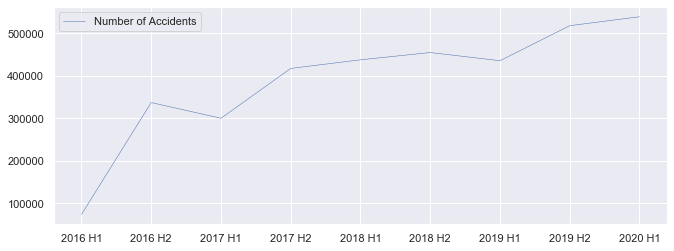

In [70]:
# plot time series
sns.set(rc={'figure.figsize':(11, 4)})

ax = df_mean_accidents_6months.plot(linewidth=0.5)
ax.grid(True)

One can notice that there is a trend towards more accidents, but of less mean severity.

### GPS location of the accidents

<Figure size 1008x576 with 0 Axes>

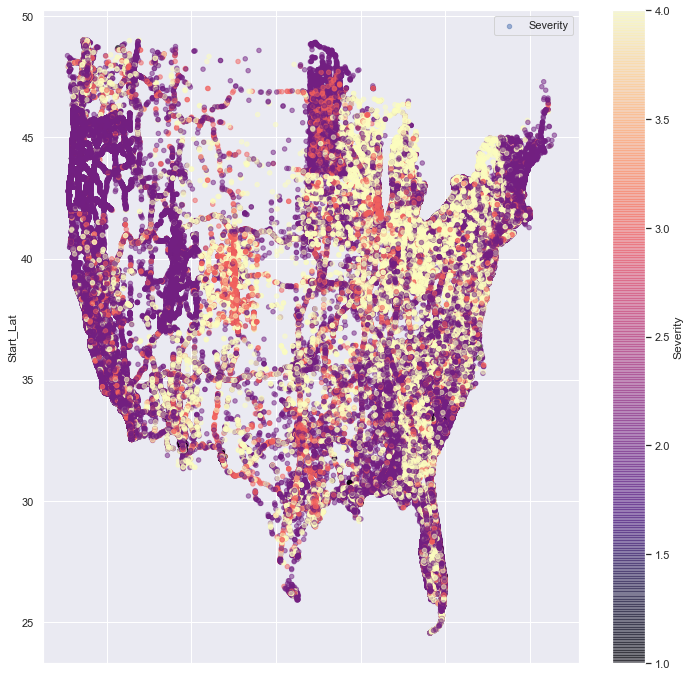

In [71]:
### GPS location of the accidents

plt.figure(figsize=(14,8))

ax = df.plot(kind='scatter', x='Start_Lng', y='Start_Lat', label='Severity', c='Severity', cmap=plt.get_cmap('magma'), colorbar=True, alpha=0.5, figsize=(12,12))
ax.legend()
plt.ioff()

One can notice the biggest density in severe accidents is in the North-East and East part of the USA.

### Description Top 100 Key Words

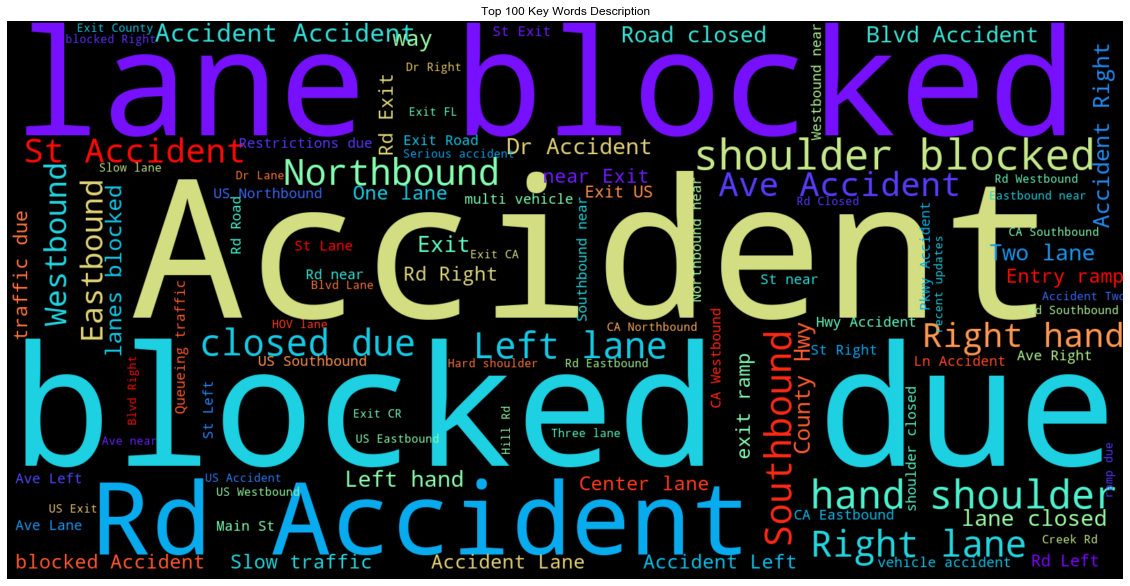

In [72]:
### Description Top 100 Key Words
from wordcloud import WordCloud
plt.style.use('seaborn')
words = df["Description"].str.split("(").str[0].value_counts().keys()

wordcloud = WordCloud(scale=4, max_words=100, colormap="rainbow", background_color="black").generate(" ".join(words))
plt.figure(figsize=(20,14))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top 100 Key Words Description", color='black')
plt.show()

## Correlation matrix

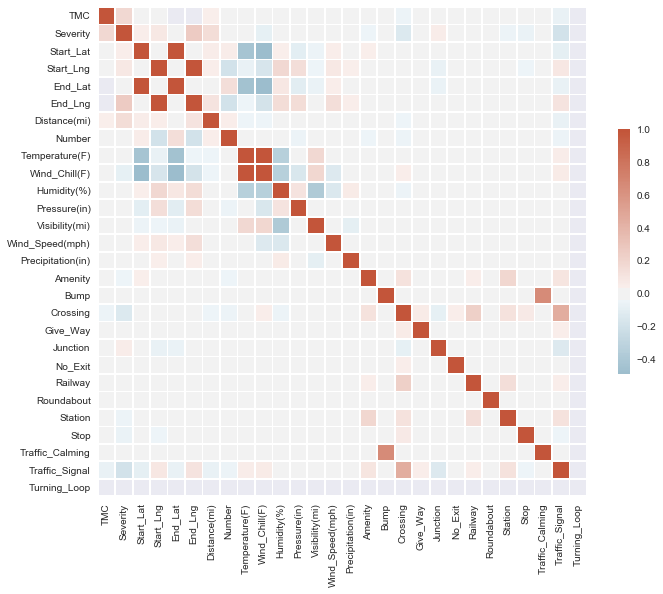

In [73]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.8, cbar_kws={"shrink": .5})

The start_lat and end_lat are highly correlated and the same applies to longitude.<br> The temperature and wind chill are also highly correlated

## Missing Values

In [74]:
print('Percentage of NaNs per category:')
print('*'*40)
print()

df.isnull().sum()/len(df)*100

Percentage of NaNs per category:
****************************************



ID                        0.000000
Source                    0.000000
TMC                      29.451104
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Duration                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  70.548896
End_Lng                  70.548896
Distance(mi)              0.000000
Description               0.000028
Number                   64.402694
Street                    0.000000
Side                      0.000000
City                      0.003188
County                    0.000000
State                     0.000000
Zipcode                   0.030424
Country                   0.000000
Timezone                  0.110428
Airport_Code              0.192337
Weather_Timestamp         1.233003
Temperature(F)            1.870779
Wind_Chill(F)            53.171675
Humidity(%)               1.983341
Pressure(in)              1.590441
Visibility(mi)      

In [75]:
not_nan_categories = (df.isnull().sum()/len(df)*100) < 50

df_clean = df.loc[:, not_nan_categories]
print(type(df_clean))
df_clean.to_csv("US_Accidents_June20_CLEAN_Week1.csv")
df_clean

<class 'pandas.core.frame.DataFrame'>


,ID,Source,TMC,Severity,Start_Time,End_Time,Duration,Start_Lat,Start_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,05:14:00,39.865147,-84.058723,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,00:30:00,39.928059,-82.831184,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,00:30:00,39.063148,-84.032608,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,00:30:00,39.747753,-84.205582,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,00:30:00,39.627781,-84.188354,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,00:28:36,34.002480,-117.379360,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,00:26:53,32.766960,-117.148060,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,00:28:28,33.775450,-117.847790,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,00:29:21,33.992460,-118.403020,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


The clean dataset includes 45 of the 50 categories. I added the category 'Duration' to describe the time needed to clear out the accident and got rid of the 5 features that had more than 50% of the values as NaNs.